# Laboratorium 04 - Efekt Rungego
## Błażej Naziemiec i Szymon Żuk
### 30 marca 2025

## Wstęp
Celem laboratorium było zapoznanie się z efektrm Rungego, czyli pogarszaniu się interpolacji wraz z zwiększaniem liczby węzłów. Aby to zaprezentować, należało zaimplementować interpolację wielomianową w kilku wariantach: wielomianów Lagrange'a z równoodległymi węzłami, kubicznymi funkcjami sklejanymi z równoodległymi węzłami oraz wielomianów Lagrange'a z węzłąmi Chebysheva. Dodatkowo dla przedziału $[-1, 1]$ należało wygenerować punkty: Chebysheva, Legrendre'a oraz równomiernie rozłożone dla $n=10, 20, 50$. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def generate_chebyshev_nodes(n):
    i = np.arange(n)
    return -np.cos(i * np.pi / n)

In [23]:
def generate_legendre_nodes(n):
    return np.polynomial.legendre.leggauss(n)[0]

In [24]:
def generate_uniform_nodes(n):
    return np.linspace(-1, 1, n)

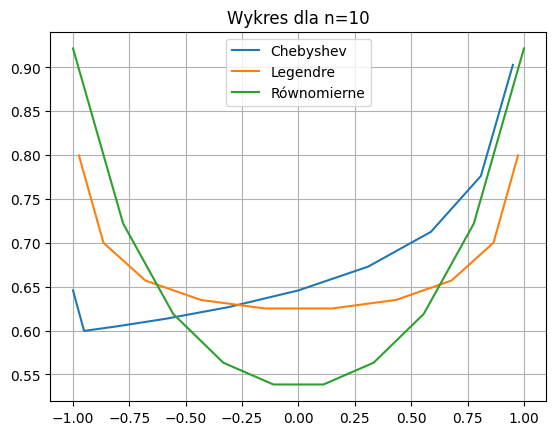

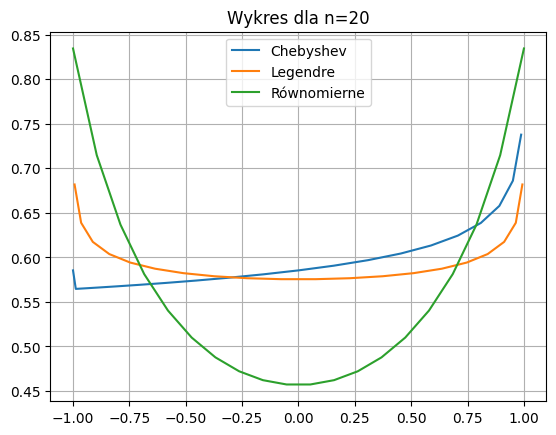

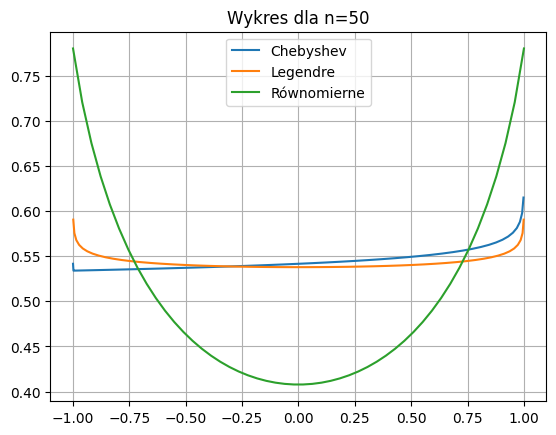

In [25]:
def calculate_distance_geometric_mean(x_vec, index):
    x = x_vec[index]
    distances = np.array([abs(xi - x) for xi in x_vec if xi != x])
    return np.prod(distances)**(1 / len(distances))

def plot_points(x_vec_list, labels, title):
    for x_vec, label in zip(x_vec_list, labels):
        y_vec = [calculate_distance_geometric_mean(x_vec, i) for i in range(len(x_vec))]
        plt.plot(x_vec, y_vec, label=label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

for n in (10, 20, 50):
    plot_points([generate_chebyshev_nodes(n),
               generate_legendre_nodes(n),
               generate_uniform_nodes(n)],
              ["Chebyshev", "Legendre", "Równomierne"],
              f"Wykres dla n={n}")